In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [2]:
train = pd.read_csv("kkbox_data/sorted_train_v2.csv")
train = train.drop("Unnamed: 0", axis=1)

test = pd.read_csv("kkbox_data/sorted_test_v2.csv")
test = test.drop("Unnamed: 0", axis=1)

# There's a row with amt_per_day as infinity, we need to remove it.
train = train.drop(index=1600826)

# Remove columns that is deemed useless
cols = [c for c in train.columns if c not in ['is_churn', 'msno', 'discount', 'is_discount', 'membership_days', 'total_secs']]

features = pd.DataFrame(train[cols])
features_test = pd.DataFrame(test[cols])
target = pd.DataFrame(train['is_churn'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state = 101)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
features = sc.fit_transform(X_train)
features_test = sc.transform(X_test)

In [5]:
## Keras Encoder

import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras import regularizers

Using TensorFlow backend.


In [6]:
features.shape[1]

28

In [7]:
def create_baseline():
    classifier = Sequential()
    classifier.add(Dense(output_dim = 16, activation='sigmoid', input_dim = int(features.shape[1])))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    classifier.add(Dense(output_dim = 8, activation='sigmoid'))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    classifier.add(Dense(output_dim = 4, activation='sigmoid'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(output_dim = 1, activation='sigmoid'))
    classifier.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['accuracy'])
    
    return classifier

In [8]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=20, batch_size=512)
estimator.fit(features, y_train)

/anaconda/envs/python_finance/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=28, units=16)`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/envs/python_finance/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=8)`
  
/anaconda/envs/python_finance/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=4)`
  if __name__ == '__main__':
/anaconda/envs/python_finance/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
1374723/1374723 [==============================] - 25s - loss: 0.2811 - acc: 0.8972    
Epoch 2/20
1374723/1374723 [==============================] - 25s - loss: 0.1861 - acc: 0.9232    
Epoch 3/20
1374723/1374723 [==============================] - 26s - loss: 0.1663 - acc: 0.9232    
Epoch 4/20
1374723/1374723 [==============================] - 24s - loss: 0.1601 - acc: 0.9235    
Epoch 5/20
1374723/1374723 [==============================] - 23s - loss: 0.1567 - acc: 0.9305    
Epoch 6/20
1374723/1374723 [==============================] - 22s - loss: 0.1535 - acc: 0.9355    
Epoch 7/20
1374723/1374723 [==============================] - 20s - loss: 0.1505 - acc: 0.9387    
Epoch 8/20
1374723/1374723 [==============================] - 21s - loss: 0.1482 - acc: 0.9406    
Epoch 9/20
1374723/1374723 [==============================] - 20s - loss: 0.1464 - acc: 0.9418    
Epoch 10/20
1374723/1374723 [==============================] - 21s - loss: 0.1448 - acc: 0.9428    
Epoch 11/

In [9]:
y_pred = estimator.predict(features_test)

589167/589167 [==============================] - 3s     


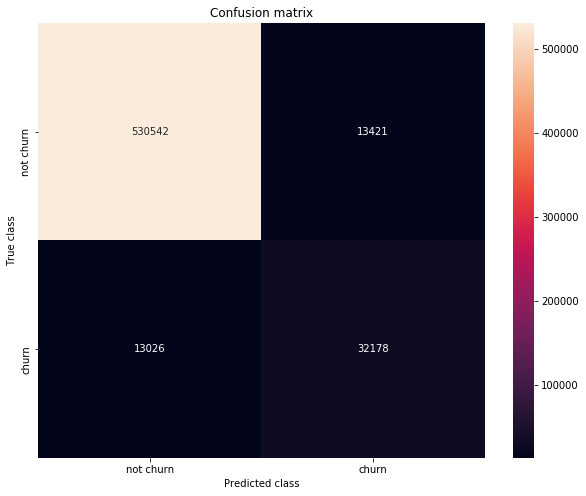

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, xticklabels=['not churn', 'churn'], yticklabels=['not churn', 'churn'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

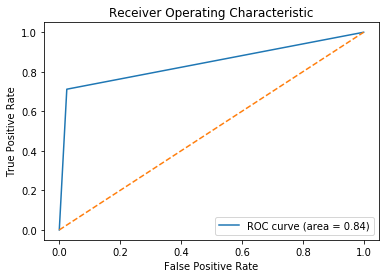

In [13]:
from sklearn.metrics import roc_curve, auc  
 
(false_positive_rate, true_positive_rate, threshold) = roc_curve(y_test, y_pred)  
roc_auc = auc(false_positive_rate, true_positive_rate)  
 
plt.title('Receiver Operating Characteristic')  
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], ls="--")  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.legend(loc="lower right")  
plt.show()  

# Use Full Data

In [15]:
features = pd.DataFrame(train[cols])
features_test = pd.DataFrame(test[cols])
target = pd.DataFrame(train['is_churn'])

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
features = sc.fit_transform(features)
features_test = sc.transform(features_test)

In [17]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=20, batch_size=512)
estimator.fit(features, target)

/anaconda/envs/python_finance/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=28, units=16)`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/envs/python_finance/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=8)`
  
/anaconda/envs/python_finance/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=4)`
  if __name__ == '__main__':
/anaconda/envs/python_finance/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
1963890/1963890 [==============================] - 39s - loss: 0.2414 - acc: 0.9115    
Epoch 2/20
1963890/1963890 [==============================] - 43s - loss: 0.1709 - acc: 0.9232    
Epoch 3/20
1963890/1963890 [==============================] - 36s - loss: 0.1613 - acc: 0.9232    
Epoch 4/20
1963890/1963890 [==============================] - 44s - loss: 0.1588 - acc: 0.9232    
Epoch 5/20
1963890/1963890 [==============================] - 44s - loss: 0.1576 - acc: 0.9232    
Epoch 6/20
1963890/1963890 [==============================] - 40s - loss: 0.1569 - acc: 0.9232    
Epoch 7/20
1963890/1963890 [==============================] - 42s - loss: 0.1565 - acc: 0.9232    
Epoch 8/20
1963890/1963890 [==============================] - 39s - loss: 0.1560 - acc: 0.9232    
Epoch 9/20
1963890/1963890 [==============================] - 41s - loss: 0.1557 - acc: 0.9232    
Epoch 10/20
1963890/1963890 [==============================] - 40s - loss: 0.1553 - acc: 0.9232    
Epoch 11/

KeyboardInterrupt: 

In [ ]:
final_prediction_proba = estimator.predict_proba(features_test)

In [ ]:
final_prediction_proba = pd.DataFrame(final_prediction_proba)
final_pred_csv = pd.DataFrame({'msno': test['msno']})

final_pred_csv['is_churn'] = final_prediction_proba[1]
final_pred_csv.to_csv('Final_Score_For_ML.csv', index=False)